# Perceptrón

## Base de las redes neuronales atificiales

- Este fué inspirado en las neuronas biológicas.

# Datos de entrenamiento

## Perceptrón
### Datos linealmente separables

In [1]:
import numpy as np
import matplotlib.pyplot as plt

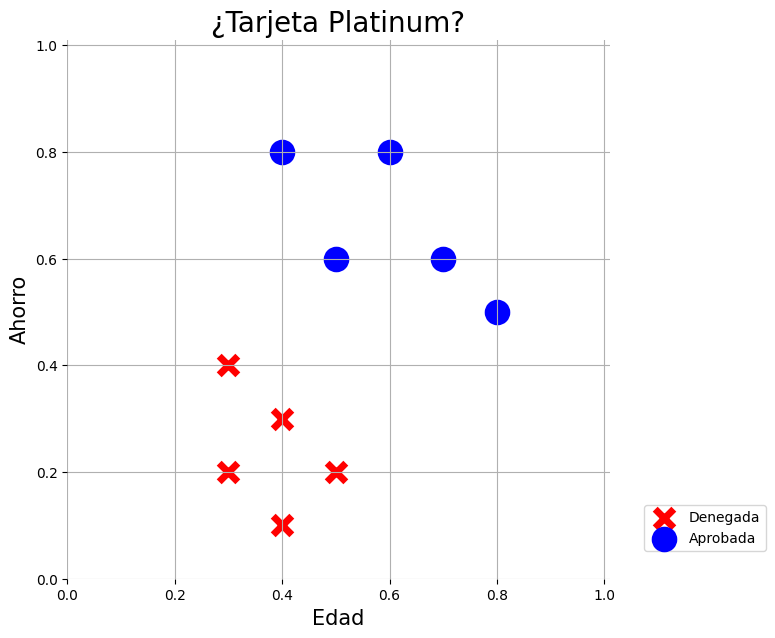

In [3]:
# Datos de 10 personas -> [edad, ahorro]
personas = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1],
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6],
                     [0.7, 0.6], [0.8, 0.5]])

# 1: aprobada - 2: denegada
clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Gráfica de dispersión (edad, ahorro)
plt.figure(figsize=(7, 7))
plt.title("¿Tarjeta Platinum?", fontsize=20)
plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")

plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.grid()
plt.show()

# Función de Activación

### Escalón

In [10]:
# w1*x1 + w2*x2 + ... + wn*xn
# b = umbral
# x = entrada
# w = pesos

def activacion(pesos, x, b):
    
    # Función de activación
    z = pesos * x
    if z.sum() + b > 0:
        return 1
    else:
        return 0


# Creamos un vector de pesos
pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)

pesos, b, activacion(pesos, [0.5, 0.5], b)

# Tengamos en cuenta que estos resultados no son los más optimos ya que no hemos entrenado nuestra función de activación, solo le pasamos datos arbitrarios para hacer que nuestro perceptrón tome decisiones.
# Debemos ajustar los pesos en función del error.

(array([-0.42965438, -0.82581975]), 0.08176919664548454, 0)

# Pseudocódigo del Perceptrón

> 0. Inicializamos los pesos y el umbral
>
> 1. epocas máximas = 100
>
> 2. epoca = 0
>
> 3. tasa de aprendizaje = 0.01
>
> 4. Mientras (epoca < epocas máximas) hacer:
>> 5. Para cada instancia de entrenamiento hacer:
>>> 6. Calcula salida del perceptrón para esta instancia
>>> 7. Calcula el error
>>> 8. Actualiza pesos y umbral usando la tasa de aprendizaje, la instancia y el error
>> 9. epoca += 1

# Entrenamiento del perceptrón

In [44]:
pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1 , 1)
tasa_de_aprendizaje = 0.01
epocas = 200

for epoca in range(epocas):
    # Verificamos cuál es el error que está ocurriendo cada epoca para ver como converge, lo que implicaría que ha terminado de aprender. Esto es cuando el error es = 0.
    error_total = 0
    
    # Iniciamos la iteración para cada una de las entradas.
    for i in range(len(personas)):
        prediccion = activacion(pesos, personas[i], b)
        error = clases[i] - prediccion
        # Se va incrementando el error total en fucnión de los potenciales errores que vayamos encontrando. A demás pueden haber errores positivos o negativos, por lo que normalmente se eleva al cuadrado y con eso, quitamos el simbolo del error y le damos las peso a los errores grandes y menos peso a los errores pequeños.
        error_total += error**2
        
        # Actualizamos los pesos de cada una de las entradas[i] (0: edad, 1: ahorro)
        personas[0] += tasa_de_aprendizaje * personas[i][0] * error
        personas[1] += tasa_de_aprendizaje * personas[i][1] * error
        
        # Actualizamos el umbral
        b += tasa_de_aprendizaje * error
    
    print(error_total, end=" ")
    
# Verificando que tome las decisiones adecuadas. Le vamos a decir que tome una persona de 10 años (0.1) y que tiene 0 pesos en el banco. Esperamos que esto siempre de cero.
activacion(pesos, [0.5, 0.8], b)


2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

1

# Zonas de Aprobación

### Gráfica de dispersión [edad, ahorro]

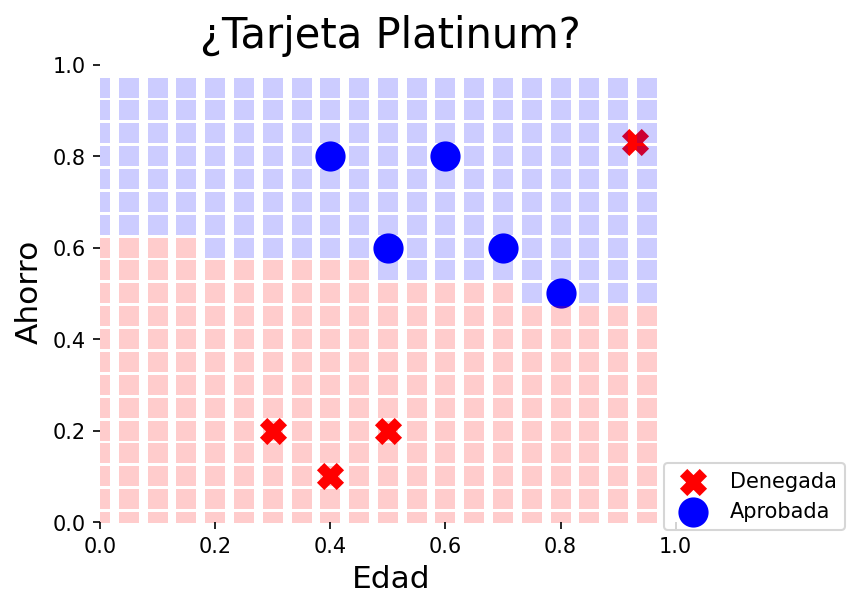

In [50]:
plt.figure(figsize=(5, 4), dpi=150)
plt.title("¿Tarjeta Platinum?", fontsize=20)

plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=90, color="red",
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=90, color="blue",
            linewidths=5, label="Aprobada")

for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color = activacion(pesos, [edad, ahorro], b)
        if color == 1:
            plt.scatter(edad, ahorro, marker="s", s=100,
                        color="blue", alpha=0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker="s", s=100, 
                        color="red", alpha=0.2, linewidths=0)
            
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()

# Crear un perceptrón con Scikit-Learn

In [52]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron().fit(personas, clases)
perceptron.predict([[0.2, 0.2], [0.8, 0.8]])

array([1, 1])